In [48]:
# melakukan import beberapa library
# untuk dataframe
import pandas as pd
import numpy as np
# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
# untuk preprocessing data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import copy

# Get Data

In [49]:
# mengambil data yang akan diuji pada algoritma
df_kend_train = pd.read_csv('./dataset/kendaraan_train.csv')
df_kend_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Exploration Data

### Sum & Count Data

In [50]:
# menghitung jumlah data
print("Total Data Kendaraan ", len(df_kend_train.index))
df_kend_train.count()

Total Data Kendaraan  285831


id                   285831
Jenis_Kelamin        271391
Umur                 271617
SIM                  271427
Kode_Daerah          271525
Sudah_Asuransi       271602
Umur_Kendaraan       271556
Kendaraan_Rusak      271643
Premi                271262
Kanal_Penjualan      271532
Lama_Berlangganan    271839
Tertarik             285831
dtype: int64

### Check Data Type

In [51]:
df_kend_train.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

### Check for missing values

In [52]:
df_kend_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

### Check Distribution & Skewed Data

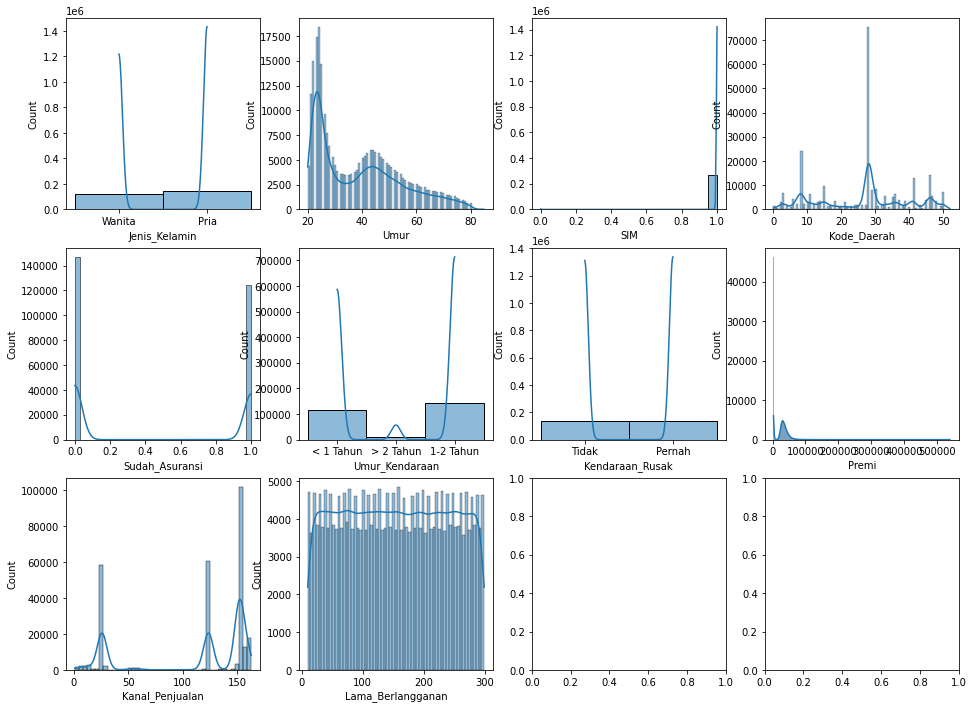

In [53]:
# mellihat persebaran data apakah normal atau terdapat skewed data atau data yang miring
fig, ax = plt.subplots(nrows= 3, ncols=4, figsize=(16,12))
sns.histplot(x="Jenis_Kelamin", data=df_kend_train, kde=True, ax=ax[0,0])
sns.histplot(x="Umur", data=df_kend_train, kde=True, ax=ax[0,1])
sns.histplot(x="SIM", data=df_kend_train, kde=True, ax=ax[0,2])
sns.histplot(x="Kode_Daerah", data=df_kend_train, kde=True, ax=ax[0,3])
sns.histplot(x="Sudah_Asuransi", data=df_kend_train, kde=True, ax=ax[1,0])
sns.histplot(x="Umur_Kendaraan", data=df_kend_train, kde=True, ax=ax[1,1])
sns.histplot(x="Kendaraan_Rusak", data=df_kend_train, kde=True, ax=ax[1,2])
sns.histplot(x="Premi", data=df_kend_train, kde=True, ax=ax[1,3])
sns.histplot(x="Kanal_Penjualan", data=df_kend_train, kde=True, ax=ax[2,0])
sns.histplot(x="Lama_Berlangganan", data=df_kend_train, kde=True, ax=ax[2,1])
plt.show()

In [54]:
# melihat score dari skew
df_kend_train.skew(skipna=True)

id                    0.000000
Umur                  0.671077
SIM                 -21.489056
Kode_Daerah          -0.116322
Sudah_Asuransi        0.165452
Premi                 1.656493
Kanal_Penjualan      -0.899909
Lama_Berlangganan     0.003858
Tertarik              2.303219
dtype: float64

### Check Outlier

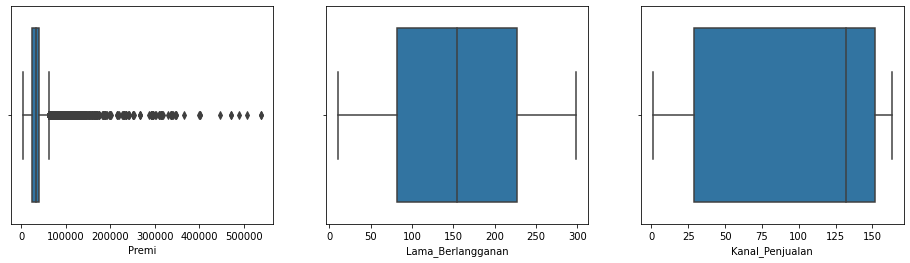

In [55]:
# mengecek outlier pada beberapa data yang mungkin terdapat outlier
fig, ax = plt.subplots(ncols=3, figsize=(16,4))
sns.boxplot(x='Premi', data=df_kend_train, ax=ax[0])
sns.boxplot(x='Lama_Berlangganan', data=df_kend_train, ax=ax[1])
sns.boxplot(x='Kanal_Penjualan', data=df_kend_train, ax=ax[2])
plt.show()

## Preprocessing Data

### Delete Unused Data

In [56]:
del df_kend_train['id']
del df_kend_train['Tertarik']
df_kend_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


### Drop Duplicate Data

In [57]:
print("Total Data Sebelum di Duplicate: ", len(df_kend_train))
print("Total Duplicate Data: ", df_kend_train.duplicated(keep='first').sum())
df_kend_train.drop_duplicates(inplace=True)
print("Total Data Setelah di Duplicate: ", len(df_kend_train))
df_kend_train.head()

Total Data Sebelum di Duplicate:  285831
Total Duplicate Data:  198
Total Data Setelah di Duplicate:  285831


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


### Categorical Data (Label Encoding)

In [58]:
labelencoder = LabelEncoder()
def encode(type, change):
  df_kend_train[type] = labelencoder.fit_transform(df_kend_train[type])
  df_kend_train[type] = df_kend_train[type].replace(change, np.NaN)

encode('Jenis_Kelamin', 2)
encode('Umur_Kendaraan', 3)
encode('Kendaraan_Rusak', 2)
df_kend_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0
1,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0
3,1.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0
4,0.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0


### Fill Empty Value Using Skewness

In [59]:
# fill column SIM and Premi with median because skewed data and other columns with mean
df_kend_train['SIM'] = df_kend_train['SIM'].fillna(df_kend_train['SIM'].median())
df_kend_train['Premi'] = df_kend_train['Premi'].fillna(df_kend_train['Premi'].median())
df_kend_train = df_kend_train.fillna(df_kend_train.mean())

df_kend_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

### Remove Outlier

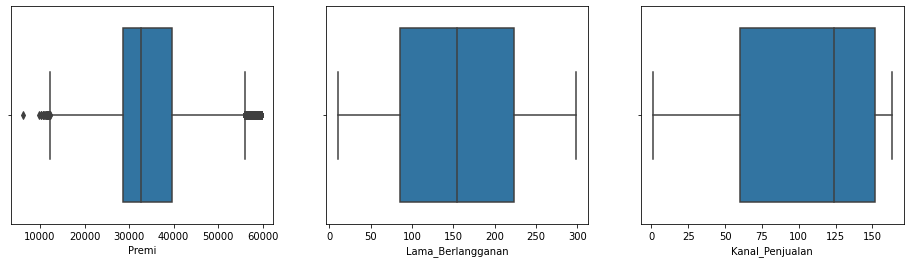

In [60]:
# made for eksperimen data with outlier
df_kend_train_outlier = copy.deepcopy(df_kend_train)

column_outlier = df_kend_train['Premi']
# calculate interquartile between 25 dan 75 quantile
q1, q3 = column_outlier.quantile(0.25), column_outlier.quantile(0.75)
interquartile = q3-q1

# calculate to get lower and upper bound
cut_outlier = (1.5 * interquartile)
lower_bound, upper_bound = (q1 - cut_outlier), (q3 + cut_outlier)

# remove outlier that < lower and > upper
df_kend_train = df_kend_train[~((column_outlier < lower_bound) | (column_outlier > upper_bound))]

fig, ax = plt.subplots(nrows= 1, ncols=3, figsize=(16,4))
sns.boxplot(x='Premi', data=df_kend_train, ax=ax[0])
sns.boxplot(x='Lama_Berlangganan', data=df_kend_train, ax=ax[1])
sns.boxplot(x='Kanal_Penjualan', data=df_kend_train, ax=ax[2])
plt.show()


### Normalization Data (MinMax Scaler)

In [61]:
columnName = [
  'Premi', 'Lama_Berlangganan', 'Umur', 'Kode_Daerah', 'Kanal_Penjualan', 'Jenis_Kelamin'
  , 'SIM', 'Kendaraan_Rusak', 'Sudah_Asuransi', 'Umur_Kendaraan'
]

scaler = MinMaxScaler()
df_kend_train[columnName] = scaler.fit_transform(df_kend_train[columnName].values)
df_kend_train_outlier[columnName] = scaler.fit_transform(df_kend_train_outlier[columnName].values)
df_kend_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.000000,0.153846,1.0,0.634615,1.0,0.5,1.000000,0.409000,0.932099,0.301038
1,0.000000,0.430769,1.0,0.750000,0.0,1.0,0.000000,0.367431,0.172840,0.512111
2,0.459533,0.015385,1.0,0.884615,1.0,0.5,1.000000,0.496727,0.981481,0.377163
4,0.000000,0.461538,1.0,0.673077,0.0,1.0,0.495209,0.536338,0.537037,0.636678
5,0.000000,0.015385,1.0,0.673077,1.0,0.5,1.000000,0.310270,0.932099,0.557093


## Export Data to New CSV

In [62]:
print("jumlah data: ", len(df_kend_train))
print("jumlah data: ", len(df_kend_train_outlier))
df_kend_train.to_csv('dataset/kendaraan_train_clean.csv', index=False)
df_kend_train_outlier.to_csv('dataset/kendaraan_train_clean_outlier.csv', index=False)

jumlah data:  230690
jumlah data:  285831
